<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

# Цель проекта

Построить модель способную оперделить рыночную стоимость автомобиля сервиса. Метрика RMSE должна быть не больше 2500

# Описание данных

**Признаки**

- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- Repaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

**Целевой признак**

- Price — цена (евро)

# План работы

- Подготовить данные
 - Ознакомимся с датафреймом, отметим его особенности для дальнейшей работы
 - Проверим на дубликаты
 - Избавимся от аномалий
 - Избавимся от пропусков
 - Проверим на неявные дубликаты
- Обучить модели
 - Разделим выборку
 - Закодируем данные
- Проанализировать модели


## Подготовка данных

### Знакомство с данными

Импортируем все необходимые библиотеки

In [1]:
import warnings
warnings.filterwarnings("ignore")

import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler
)

from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.dummy import DummyRegressor

Запишем данные в переменную, посмотрим на несколько строк и выведим info

In [2]:
data = pd.read_csv('/datasets/autos.csv')

In [3]:
data.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

По первым 10 строкам видно, что есть нулевые значения в Price и Power, это, вероятно, аномалии, так же есть много пропусков, особенно в Repaired, посчитаем их

In [5]:
data.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

Посмотрим на весь датасет построив гистограммы

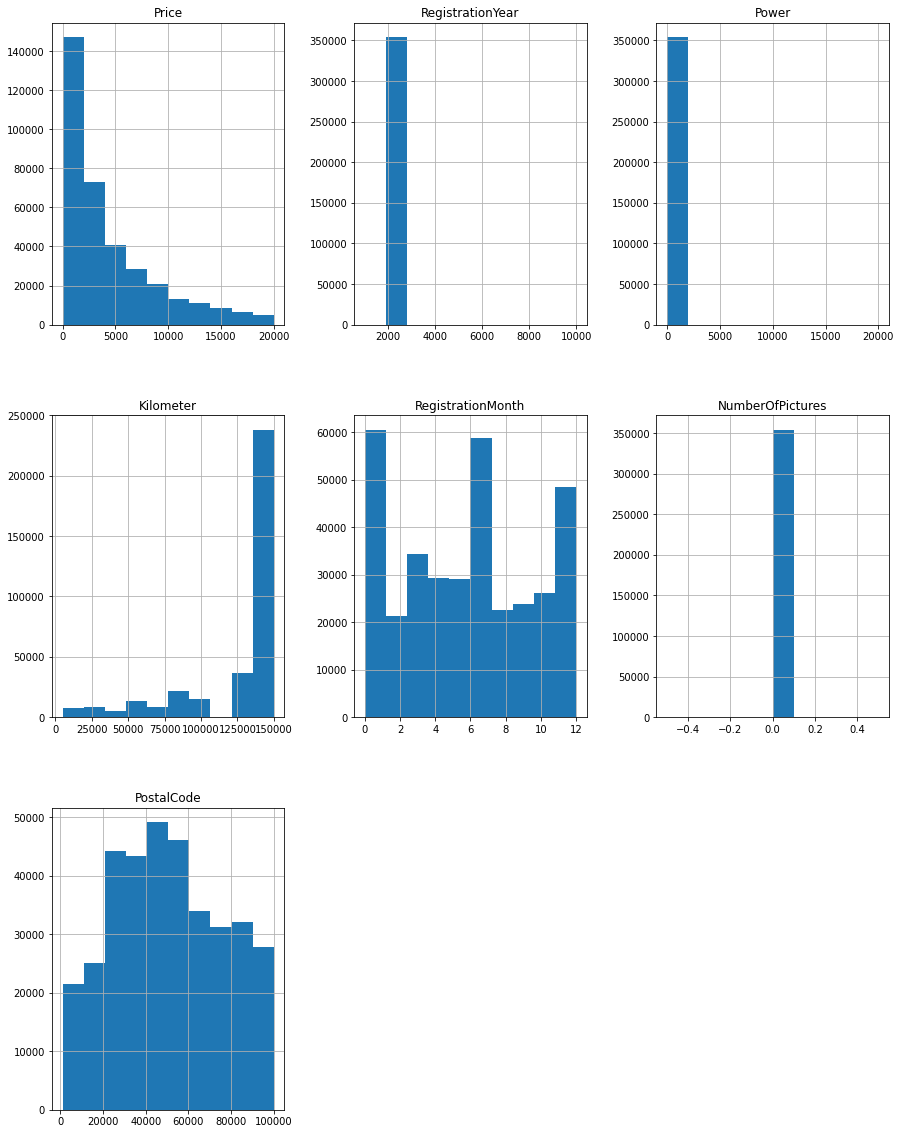

In [6]:
data.hist(figsize=(15, 20));

Отметим, что в Price большое количество строк находится близко к нулю, RegistrationYear и Power не отображаются нормально, тк есть большие аномалии,а в Kilometer на первый взгляд все нормально. Так же заметим, что в NumberOfPictures одни нули. Можно приступать к предобработке данных.

### Предобработка данных

Для начала проверим на дубликаты

In [7]:
data.duplicated().sum()

4

Удалим их

In [8]:
data.drop_duplicates(inplace=True)

Теперь избавимся от ненужных столбцов не влияющих на обучение моделей, а именно:
- DateCrawled, DateCreated и LastSeen, тк это просто даты скачиваний, созданий объявлений и дата активности пользователя 
- PostalCode, тк просто почтовый индекс пользователя
- NumberOfPictures, тк количество фотографий в каждой строке равно нулю

In [9]:
data.drop(columns = ['DateCrawled', 'DateCreated', 'LastSeen', 'NumberOfPictures', 'PostalCode'], inplace=True)

Теперь посмотрим на аномальные значения в Price, RegistrationYear и Power, затем обработаем их.

Начнем с Price

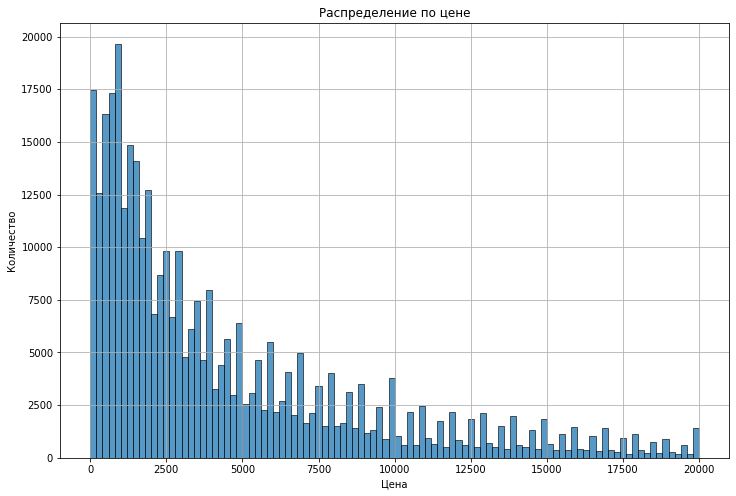

In [10]:
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x="Price", bins=100)
plt.grid(True)
plt.xlabel('Цена');
plt.ylabel('Количество');
plt.title('Распределение по цене');

Видим, что много значений возле нуля, посмотрим сколько их

In [11]:
data.query('Price < 100').count()

Price                13314
VehicleType           8436
RegistrationYear     13314
Gearbox               9795
Power                13314
Model                10642
Kilometer            13314
RegistrationMonth    13314
FuelType              8768
Brand                13314
Repaired              6517
dtype: int64

Видим, что 13314 строк имеют цену нижу 100 евро, их мы сочтем за аномалии, добавим обновленные данные в новый датафрейм

In [12]:
data_new = data.query('Price >= 100')

Теперь посмотрим на RegistrationYear

(1950.0, 2023.0)

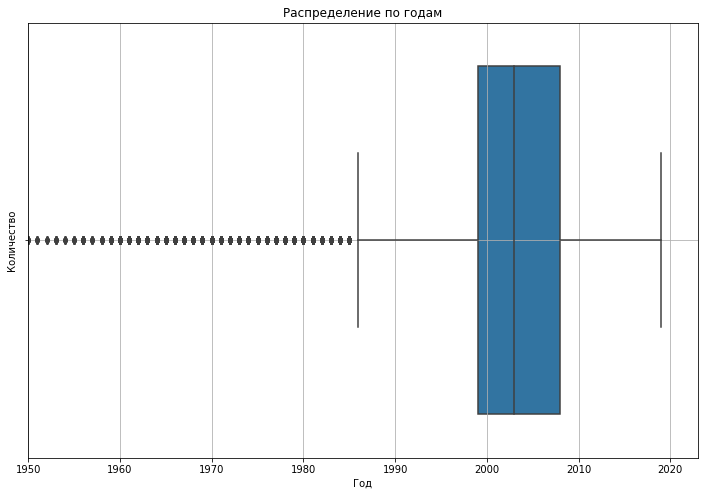

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_new, x="RegistrationYear")
plt.grid(True)
plt.xlabel('Год');
plt.ylabel('Количество');
plt.title('Распределение по годам');
plt.xlim([1950, 2023])

Применили ограничение по оси "х", тк много аномальных значений, график получается растянутым. Посмотрим сколько значений до 1950 и после 2016(год выгрузки датафрейма).

In [14]:
data_new.query('RegistrationYear < 1950').count() + data_new.query('RegistrationYear > 2016').count()

Price                13832
VehicleType             96
RegistrationYear     13832
Gearbox              12080
Power                13832
Model                11927
Kilometer            13832
RegistrationMonth    13832
FuelType              8561
Brand                13832
Repaired              7853
dtype: int64

Видим, что 13832 строк не вписываются в заданный диапазон, удалим их

In [15]:
data_new = data_new.query('RegistrationYear >= 1950')
data_new = data_new.query('RegistrationYear < 2017')

Теперь посмотрим на Power

(0.0, 1000.0)

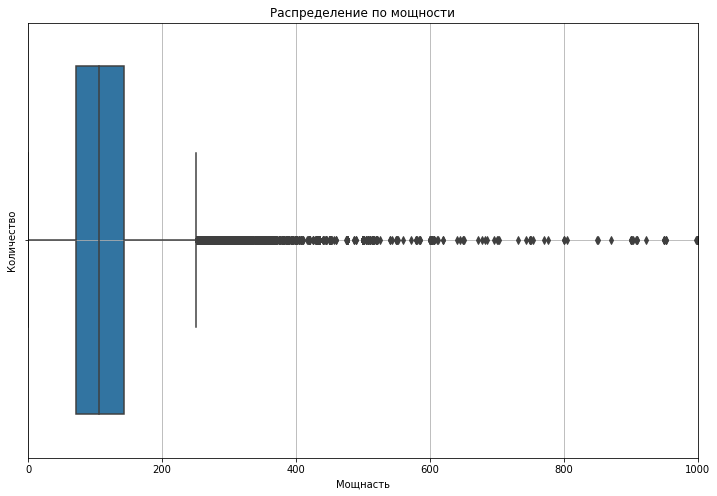

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_new, x="Power")
plt.grid(True)
plt.xlabel('Мощнасть');
plt.ylabel('Количество');
plt.title('Распределение по мощности');
plt.xlim([0, 1000])

Применили ограничение по оси "х", тк много аномальных значений, график получается растянутым. Преполагаем, что мощность машины не может быть меньше 20 и быть больше 1000, посмотрим сколько не входит в данный диапазон

In [17]:
data_new.query('Power < 20').count() + data_new.query('Power > 1000').count()

Price                32182
VehicleType          24113
RegistrationYear     32182
Gearbox              22866
Power                32182
Model                27941
Kilometer            32182
RegistrationMonth    32182
FuelType             24411
Brand                32182
Repaired             16230
dtype: int64

Видим, что 32182 строк не вписываются в заданный диапазон, удалим их

In [18]:
data_new = data_new.query('Power >= 20')
data_new = data_new.query('Power < 1001')

Посмотрим сколько мы убрали данных от изначального датафрейма

In [19]:
print('Потеряно', round((1-data_new.shape[0]/data.shape[0]) * 100), '% от изначального датафрейма')

Потеряно 17 % от изначального датафрейма


Будем считать сохранение больше 80 процентов от изначального датафрейма удовлетворительным

Теперь обработаем пропуски в данных

In [20]:
data_new.isna().sum()

Price                    0
VehicleType          10807
RegistrationYear         0
Gearbox               5246
Power                    0
Model                10887
Kilometer                0
RegistrationMonth        0
FuelType             15307
Brand                    0
Repaired             42426
dtype: int64

Тк пропусков много, то удалить мы их не можем. Посмотрим на уникальные значения столбцов с пропусками, так мы проверим данные на неявные дубликаты и заодно посмотрим, может мы заменить пустые значения на что-то уже существующие

In [21]:
data_new['VehicleType'].unique()

array(['coupe', 'suv', 'small', 'sedan', 'convertible', 'bus', 'wagon',
       nan, 'other'], dtype=object)

Можем записать все пропуски как other

In [22]:
data_new['VehicleType'] = data_new['VehicleType'].fillna('other')

In [23]:
data_new['Gearbox'].unique()

array(['manual', 'auto', nan], dtype=object)

Тк коробок передач больше, чем две, то пропуски можно записать как other

In [24]:
data_new['Gearbox'] = data_new['Gearbox'].fillna('other')

In [25]:
data_new['Model'].unique()

array([nan, 'grand', 'golf', 'fabia', '3er', '2_reihe', 'c_max',
       '3_reihe', 'passat', 'navara', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'arosa', 'other', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'one', 'fortwo', '1er',
       'b_klasse', 'a8', 'jetta', 'fiesta', 'c_klasse', 'micra', 'vito',
       'sprinter', 'astra', '156', 'escort', 'forester', 'xc_reihe',
       'scenic', 'ka', 'a1', 'focus', 'a4', 'tt', 'a6', 'jazz', 'omega',
       'slk', '7er', 'combo', 'corsa', '80', '147', 'z_reihe', 'sorento',
       'ibiza', 'mustang', 'eos', 'touran', 'getz', 'insignia', 'almera',
       'megane', 'a3', 'lupo', 'r19', 'caddy', 'mondeo', 'cordoba',
       'colt', 'impreza', 'vectra', 'berlingo', 'tiguan', '6_reihe', 'c4',
       'panda', 'up', 'i_reihe', 'ceed', 'kangoo', '5_reihe', 'yeti',
       'octavia', 'zafira', 'mii', 'rx_reihe', '6er', 'modus', 'fox',
       'matiz', 'beetle', 'rio', 'touareg', 'logan', 'spider', 'cuore',
       's_m

Определить к каким моделям можно отнести пропуски не получится, поэтому запишем как unknown

In [26]:
data_new['Model'] = data_new['Model'].fillna('unknown')

In [27]:
data_new['FuelType'].unique()

array(['gasoline', 'petrol', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

Можем записать все пропуски как other

In [28]:
data_new['FuelType'] = data_new['FuelType'].fillna('other')

In [29]:
data_new['Repaired'].unique()

array(['yes', nan, 'no'], dtype=object)

Определить была ли машина в ремонте не получится, поэтому запишем как unknown

In [30]:
data_new['Repaired'] = data_new['Repaired'].fillna('unknown')

Проверим, избавились ли мы от пропусков

In [31]:
data_new.isna().sum()

Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
Repaired             0
dtype: int64

Так же проверим на неявные дубликаты столбец Brand

In [32]:
data_new['Brand'].unique()

array(['audi', 'jeep', 'volkswagen', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'seat', 'honda',
       'fiat', 'opel', 'mini', 'smart', 'hyundai', 'alfa_romeo', 'subaru',
       'volvo', 'mitsubishi', 'kia', 'suzuki', 'lancia', 'citroen',
       'toyota', 'chevrolet', 'dacia', 'daihatsu', 'chrysler',
       'sonstige_autos', 'jaguar', 'daewoo', 'rover', 'porsche', 'saab',
       'trabant', 'land_rover', 'lada'], dtype=object)

### Вывод

Мы ознакомились с датафреймом, отметили его особенности для дальнейшей работы. В ходе проверки, мы обнаружили и удалили аномальные значения в столбцах Price, RegistrationYear и Power, объем удаленных данных составил 17 процентов от изначального датафрейма, что мы сочли удовлетворительным. Нами были обработаны пропуски, все они заменены на более подходящие значения изходя их данных. Также мы проверили и удалили явные дубликаты, проверка на неявные дубликаты показала их отсутствие.

## Обучение моделей

Перед началом обучения моделей нужно: Разделить данные на выборки, закодировать данные техникой OHE, тк у нас есть категоральные признаки, стандартизировать, тк численные признаки от столбца к столбцу имеют разную размерность

Разделите исходные данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1, те 60, 20 и 20 в процентах

In [33]:
train, valid_test = train_test_split(data_new, test_size=0.4, random_state=54321)

In [34]:
valid, test = train_test_split(valid_test, test_size=0.5, random_state=54321)

Создадим переменные для признаков и целевого признака для всех 3 выборок

In [35]:
features_train = train.drop('Price', axis=1)
target_train = train['Price']

In [36]:
features_valid = valid.drop('Price', axis=1)
target_valid = valid['Price']

In [37]:
features_test = test.drop('Price', axis=1)
target_test = test['Price']

Теперь закодируем категориальные данные техникой OHE

In [38]:
ohe_features = features_train.select_dtypes(include='object').columns.to_list()

In [39]:
encoder_ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder_ohe.fit(features_train[ohe_features])

pd.options.mode.chained_assignment = None

In [40]:
features_train[encoder_ohe.get_feature_names()] = encoder_ohe.transform(features_train[ohe_features])

features_train = features_train.drop(ohe_features, axis=1)

In [41]:
features_valid[encoder_ohe.get_feature_names()] = encoder_ohe.transform(features_valid[ohe_features])

features_valid = features_valid.drop(ohe_features, axis=1)

In [42]:
features_test[encoder_ohe.get_feature_names()] = encoder_ohe.transform(features_test[ohe_features])

features_test = features_test.drop(ohe_features, axis=1)

Теперь приведем численные данные к одному масштабу методом стандартизации

In [43]:
numeric = ['RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth',]

In [44]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

pd.options.mode.chained_assignment = None

In [45]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Обучим три модели: модели градиентного бустинга LightGBM и CatBoost и модель линейной регрессии, так же попробуем модели градиентного бустинга с различными гиперпараметрами

LinearRegression

In [46]:
start_time_lr = time.time()
    
model_lr = LinearRegression()
model_lr.fit(features_train, target_train)
    
model_time_lr = time.time() - start_time_lr
start_time_lr = time.time()
    
predictions_lr = model_lr.predict(features_valid)
    
predictions_time_lr = time.time() - start_time_lr
    
result_lr = mean_squared_error(target_valid, predictions_lr)
result_lr = result_lr ** 0.5

In [47]:
lr = [model_time_lr, predictions_time_lr, result_lr]
lr

[28.452855825424194, 0.23425841331481934, 2593.1250564133857]

CatBoost

In [48]:
start_time_cat_1 = time.time()

model_cat_1 = CatBoostRegressor(random_state=54321, depth=10, iterations=150, logging_level='Silent')
model_cat_1.fit(features_train, target_train)

model_time_cat_1 = time.time() - start_time_cat_1
start_time_cat_1 = time.time()

predictions_cat_1 = model_cat_1.predict(features_valid)

predictions_time_cat_1 = time.time() - start_time_cat_1

result_cat_1 = mean_squared_error(target_valid, predictions_cat_1)
result_cat_1 = result_cat_1 ** 0.5

In [49]:
cat_1 = [model_time_cat_1, predictions_time_cat_1, result_cat_1]
cat_1

[10.265698671340942, 0.08870625495910645, 1555.0911250408762]

In [50]:
start_time_cat_2 = time.time()

model_cat_2 = CatBoostRegressor(random_state=54321, learning_rate=0.1, depth=15, iterations=100, logging_level='Silent')
model_cat_2.fit(features_train, target_train)

model_time_cat_2 = time.time() - start_time_cat_2
start_time_cat_2 = time.time()

predictions_cat_2 = model_cat_2.predict(features_valid)

predictions_time_cat_2 = time.time() - start_time_cat_2

result_cat_2 = mean_squared_error(target_valid, predictions_cat_2)
result_cat_2 = result_cat_2 ** 0.5

In [51]:
cat_2 = [model_time_cat_2, predictions_time_cat_2, result_cat_2]
cat_2

[73.04460787773132, 0.07113504409790039, 1615.0955939831986]

In [52]:
start_time_cat_3 = time.time()

model_cat_3 = CatBoostRegressor(random_state=54321, learning_rate=0.5, depth=5, iterations=200, logging_level='Silent')
model_cat_3.fit(features_train, target_train)

model_time_cat_3 = time.time() - start_time_cat_3
start_time_cat_3 = time.time()

predictions_cat_3 = model_cat_3.predict(features_valid)

predictions_time_cat_3 = time.time() - start_time_cat_3

result_cat_3 = mean_squared_error(target_valid, predictions_cat_3)
result_cat_3 = result_cat_3 ** 0.5

In [53]:
cat_3 = [model_time_cat_3, predictions_time_cat_3, result_cat_3]
cat_3

[7.098975419998169, 0.06762862205505371, 1615.1283876373986]

LightGBM

In [54]:
start_time_lgbmr_1 = time.time()

model_lgbmr_1 = LGBMRegressor(random_state=54321, max_depth=10, n_estimators=150)
model_lgbmr_1.fit(features_train, target_train)

model_time_lgbmr_1 = time.time() - start_time_lgbmr_1
start_time_lgbmr_1 = time.time()

predictions_lgbmr_1 = model_lgbmr_1.predict(features_valid)

predictions_time_lgbmr_1 = time.time() - start_time_lgbmr_1

result_lgbmr_1 = mean_squared_error(target_valid, predictions_lgbmr_1)
result_lgbmr_1 = result_lgbmr_1 ** 0.5

In [55]:
lgbmr_1 = [model_time_lgbmr_1, predictions_time_lgbmr_1, result_lgbmr_1]
lgbmr_1

[8.677432298660278, 0.9977982044219971, 1635.0893013032164]

In [56]:
start_time_lgbmr_2 = time.time()

model_lgbmr_2 = LGBMRegressor(random_state=54321, learning_rate=0.1, max_depth=15, n_estimators=50)
model_lgbmr_2.fit(features_train, target_train)

model_time_lgbmr_2 = time.time() - start_time_lgbmr_2
start_time_lgbmr_2 = time.time()

predictions_lgbmr_2 = model_lgbmr_2.predict(features_valid)

predictions_time_lgbmr_2 = time.time() - start_time_lgbmr_2

result_lgbmr_2 = mean_squared_error(target_valid, predictions_lgbmr_2)
result_lgbmr_2 = result_lgbmr_2 ** 0.5

In [57]:
lgbmr_2 = [model_time_lgbmr_2, predictions_time_lgbmr_2, result_lgbmr_2]
lgbmr_2

[32.20408010482788, 0.501777172088623, 1741.1771221999384]

In [58]:
start_time_lgbmr_3 = time.time()

model_lgbmr_3 = LGBMRegressor(random_state=54321, learning_rate=0.5, max_depth=5, n_estimators=200)
model_lgbmr_3.fit(features_train, target_train)

model_time_lgbmr_3 = time.time() - start_time_lgbmr_3
start_time_lgbmr_3 = time.time()

predictions_lgbmr_3 = model_lgbmr_3.predict(features_valid)

predictions_time_lgbmr_3 = time.time() - start_time_lgbmr_3

result_lgbmr_3 = mean_squared_error(target_valid, predictions_lgbmr_3)
result_lgbmr_3 = result_lgbmr_3 ** 0.5

In [59]:
lgbmr_3 = [model_time_lgbmr_3, predictions_time_lgbmr_3, result_lgbmr_3]
lgbmr_3

[11.015601396560669, 0.8056743144989014, 1603.4777793573885]

In [60]:
data_models = pd.DataFrame(
    [lr, cat_1, cat_2, cat_3, lgbmr_1, lgbmr_2, lgbmr_3], 
     columns=['Время обучения', 'Время предсказания', 'RMSE'], 
     index=['LinearRegression','CatBoost 1','CatBoost 2', 'CatBoost 3', 'LightGBM 1', 'LightGBM 2', 'LightGBM 3']
)

In [61]:
data_models

,Время обучения,Время предсказания,RMSE
LinearRegression,28.452856,0.234258,2593.125056
CatBoost 1,10.265699,0.088706,1555.091125
CatBoost 2,73.044608,0.071135,1615.095594
CatBoost 3,7.098975,0.067629,1615.128388
LightGBM 1,8.677432,0.997798,1635.089301
LightGBM 2,32.204080,0.501777,1741.177122
LightGBM 3,11.015601,0.805674,1603.477779


### Вывод

В ходе обучения моделей нами были созданы выборки по которым будут обучаться модели. В выборках мы перекодировали категориальные данные техникой OHE, также стандартизировали все численные данные.

Обучение моделей выявило, что точнее всех (меньшую ошибку) работает модель градиентного бустинга CatBoost с гиперпараметрами depth=10 и iterations=150, а быстрее всех модель градиентного бустинга CatBoost с гиперпараметрами learning_rate=0.5, depth=5 и iterations=200. Модели LightGBM показали себя немного менее точными и быстрыми, но очень близко к CatBoost. Модель же LinearRegression показала себя хуже всех, метрика RMSE равна 2593.1, что больше необходимого значения поставленного задачей.

Для проведения проверки на тестовых данных нами выбрана модель градиентного бустинга CatBoost с гиперпараметрами depth=10 и iterations=150.

## Анализ моделей

Проведем проверку лучшей модели на тестовой выборке

In [62]:
start_time_cat_best = time.time()

model_cat_best = CatBoostRegressor(random_state=54321, depth=10, iterations=150, logging_level='Silent')
model_cat_best.fit(features_train, target_train)

model_time_cat_best = time.time() - start_time_cat_best
start_time_cat_best = time.time()

predictions_cat_best = model_cat_best.predict(features_test)

predictions_time_cat_best = time.time() - start_time_cat_best

result_cat_best = mean_squared_error(target_test, predictions_cat_best)
result_cat_best = result_cat_best ** 0.5

In [63]:
cat_best = [model_time_cat_best, predictions_time_cat_best, result_cat_best]
cat_best

[9.720098733901978, 0.07810568809509277, 1551.0288495935984]

Теперь сравним нашу модель на тестовой выборке с Dummy моделью

In [64]:
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(features_train,target_train)
predictions_dummy = dummy_model.predict(features_test)
result_dummy = mean_squared_error(target_test, predictions_dummy)
result_dummy = result_dummy ** 0.5
result_dummy

4599.20855155393

### Вывод

Лучшая модель на валидационной выборке показала на тестовой выборке RMSE = 1551, время обучения модели = 11.2 секунды, а время предсказания = 0.1 секунды. Проверка константной моделью показало RMSE = 4600

## Общий вывод

В ходе проведения работы мы ознакомились с датафреймом, отметили его особенности для дальнейшей работы. В ходе проверки, мы обнаружили и удалили аномальные значения в столбцах Price, RegistrationYear и Power, объем удаленных данных составил 17 процентов от изначального датафрейма, что мы сочли удовлетворительным. Нами были обработаны пропуски, все они заменены на более подходящие значения изходя их данных. Также мы проверили и удалили явные дубликаты, проверка на неявные дубликаты показала их отсутствие.

До обучения моделей нами были разбиты данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1, те 60, 20 и 20 в процентах, затем в выборках были преобразованы категориальные данные техникой OHE, а численные данные приведенны к одному масштабу методом стандартизации. Обучение моделей показало, что хуже всего данные обучаются на линейной регрессии, метрика rmse = 2593, что не удовлетворяет требованию (rmse не должно привышать границу в 2500) задачи. Модели LightGBM и CatBoost показали очень схожий результат, метрика rmse во всех экспериментах была около значения в 1600. Наилучший результат CatBoost с гиперпараметрами depth=10 и iterations=150, её мы и выбрали для тестирования.

Тест наилучшей модели показал такие результаты:RMSE = 1551, время обучения модели = 11.2 секунды, время предсказания = 0.1 секунды. Тест на константной модели дал результат RMSE = 4600. Исходя из всех данных делаем вывод, что с поставленной целью мы справились =).  